<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [4]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [5]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,c162506f-1395-419e-ae5b-48076e3349a0,Ryan Apriandi,https://play-lh.googleusercontent.com/a-/AD5-W...,"Aplikasi parah, saya belanja dengan CC pilih k...",1,102,5.27.3,2023-01-05 15:39:31,None,NaT
1,1e5a820b-3464-478a-926f-a473ae402175,Aya 4,https://play-lh.googleusercontent.com/a/AEdFTp...,Bagus sih. Cuman skrg ribet. krn sering kali m...,3,18,5.27.3,2023-01-17 01:15:20,None,NaT
2,798fd05d-c1b8-4bbb-b16a-fb42bb5ac32f,Ranie,https://play-lh.googleusercontent.com/a-/AD5-W...,"Setelah 4thn ga buka akun BL, barusan saya buk...",1,47,5.27.3,2023-01-13 02:11:50,None,NaT
3,9e769ec0-5063-4f7c-8fef-ac2f90b95046,Fajron Musayyab,https://play-lh.googleusercontent.com/a-/AD5-W...,"Maaf saya kasih bintang 2, karena untuk layana...",2,3,5.27.3,2023-01-11 23:20:18,None,NaT
4,99ac25bb-686c-4009-8edd-016279b23fbb,Agroprobiotik Jawa Barat,https://play-lh.googleusercontent.com/a-/AD5-W...,Sy kesulitan ingin komplen masalah pembayaran ...,2,109,5.27.2,2022-12-30 03:49:00,None,NaT


In [6]:
len(df_busu.index) #count the number of data we got

1300

In [7]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,MonicA yu,1,2020-06-03 13:10:45,Udah di install ulang tetep aja gak kebuka gam...
1296,Fahmi,1,2020-12-28 10:55:19,"Aplikasinya super super berat, kebanyakan ikla..."
1297,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,Platform terbik penyedia pelatihan Belajar di ...
1298,Pengguna Google,5,2019-02-04 14:15:16,aplikasinya makin mudah dipake. makin friendly...
1299,Pengguna Google,2,2020-02-21 12:04:43,"Aplikasinya terlalu berat, seperti RAM; Bandwi..."


In [8]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [9]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,MonicA yu,1,2020-06-03 13:10:45,Udah di install ulang tetep aja gak kebuka gam...
1296,Fahmi,1,2020-12-28 10:55:19,"Aplikasinya super super berat, kebanyakan ikla..."
1297,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,Platform terbik penyedia pelatihan Belajar di ...
1298,Pengguna Google,5,2019-02-04 14:15:16,aplikasinya makin mudah dipake. makin friendly...
1299,Pengguna Google,2,2020-02-21 12:04:43,"Aplikasinya terlalu berat, seperti RAM; Bandwi..."


In [10]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [11]:
import nltk

In [12]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [13]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Ryan Apriandi,1,2023-01-05 15:39:31,"Aplikasi parah, saya belanja dengan CC pilih k..."
1,Aya 4,3,2023-01-17 01:15:20,Bagus sih. Cuman skrg ribet. krn sering kali m...
2,Ranie,1,2023-01-13 02:11:50,"Setelah 4thn ga buka akun BL, barusan saya buk..."
3,Fajron Musayyab,2,2023-01-11 23:20:18,"Maaf saya kasih bintang 2, karena untuk layana..."
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,Sy kesulitan ingin komplen masalah pembayaran ...


In [14]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [15]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [16]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [17]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [18]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [19]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [20]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p..."
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa..."
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la..."
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba..."
...,...,...,...,...,...
1295,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke..."
1296,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,..."
1297,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja..."
1298,Pengguna Google,5,2019-02-04 14:15:16,aplikasinya makin mudah dipake makin friendly ...,"[aplikasinya, makin, mudah, dipake, makin, fri..."


In [21]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [22]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
1131,MUGIYONO,5,2023-01-18 12:40:14,sangat membantu saya untuk mencari barang yg s...,"[sangat, membantu, saya, untuk, mencari, baran..."
1130,yuma aditya,4,2023-01-18 12:29:36,susah mengganti akun dana sedangkan nomor akun...,"[susah, mengganti, akun, dana, sedangkan, nomo..."
262,Putri Adelia Khrisna,5,2023-01-18 12:18:35,mau tanya kenapa bukalapak paylaternya ga bisa...,"[mau, tanya, kenapa, bukalapak, paylaternya, g..."
1122,Ahmad Rofi,1,2023-01-18 11:27:20,mw komplain di aplikasi ini di persulit sepert...,"[mw, komplain, di, aplikasi, ini, di, persulit..."
827,Erwin Setiawann,5,2023-01-18 09:41:16,bukalapak memang top dan amanah semoga jadi de...,"[bukalapak, memang, top, dan, amanah, semoga, ..."


In [39]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [40]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(di, 3), (saya, 2), (belanja, 2), (cicilan, 2...
1    [(ribet, 2), (krn, 2), (susah, 2), (tdk, 2), (...
2    [(ada, 4), (yg, 4), (bl, 3), (barang, 3), (lbh...
3    [(tidak, 2), (sesuai, 2), (dan, 2), (maaf, 1),...
4    [(ingin, 3), (komplen, 3), (sy, 2), (pembayara...
Name: Ulasan_tokenize, dtype: object


In [41]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [aplikasi, parah, saya, belanja, dengan, cc, p...
1       [bagus, sih, cuman, skrg, ribet, krn, sering, ...
2       [setelah, thn, ga, buka, akun, bl, barusan, sa...
3       [maaf, saya, kasih, bintang, karena, untuk, la...
4       [sy, kesulitan, ingin, komplen, masalah, pemba...
                              ...                        
1295    [udah, di, install, ulang, tetep, aja, gak, ke...
1296    [aplikasinya, super, super, berat, kebanyakan,...
1297    [platform, terbik, penyedia, pelatihan, belaja...
1298    [aplikasinya, makin, mudah, dipake, makin, fri...
1299    [aplikasinya, terlalu, berat, seperti, ram, ba...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [42]:
slank_word_dict = {
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [43]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [44]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [45]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p..."
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus..."
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la..."
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem..."
...,...,...,...,...,...,...
1295,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke...","[sudah, di, install, ulang, tetap, saja, engga..."
1296,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,..."
1297,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja..."
1298,Pengguna Google,5,2019-02-04 14:15:16,aplikasinya makin mudah dipake makin friendly ...,"[aplikasinya, makin, mudah, dipake, makin, fri...","[aplikasinya, makin, mudah, dipakai, makin, fr..."


In [46]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [aplikasi, parah, saya, belanja, dengan, cc, p...
1       [bagus, sih, cuman, sekarang, ribet, karena, s...
2       [setelah, tahun, enggak, buka, akun, bl, barus...
3       [maaf, saya, kasih, bintang, karena, untuk, la...
4       [saya, kesulitan, ingin, komplen, masalah, pem...
                              ...                        
1295    [sudah, di, install, ulang, tetap, saja, engga...
1296    [aplikasinya, super, super, berat, kebanyakan,...
1297    [platform, terbik, penyedia, pelatihan, belaja...
1298    [aplikasinya, makin, mudah, dipakai, makin, fr...
1299    [aplikasinya, terlalu, berat, seperti, ram, ba...
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [47]:
from nltk.corpus import stopwords

In [48]:
list_stopwords = stopwords.words('indonesian')

In [49]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [50]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci..."
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar..."
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng..."
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,..."
...,...,...,...,...,...,...,...
1295,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke...","[sudah, di, install, ulang, tetap, saja, engga...","[install, ulang, kebuka, gambarnya, lemot, ban..."
1296,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,..."
1297,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja..."
1298,Pengguna Google,5,2019-02-04 14:15:16,aplikasinya makin mudah dipake makin friendly ...,"[aplikasinya, makin, mudah, dipake, makin, fri...","[aplikasinya, makin, mudah, dipakai, makin, fr...","[aplikasinya, mudah, dipakai, friendly, uinya,..."


In [51]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4429
------------------------
aplikasi : aplikasi
parah : parah
belanja : belanja
cc : cc
pilih : pilih
klik : klik
cicilan : cicil
tertagih : tagih
full : full
confirmasi : confirmasi
urus : urus
teman : teman
metode : metode
korban : korban
kabar : kabar
bukalapak : bukalapak
bagus : bagus
sih : sih
cuman : cuman
ribet : ribet
kali : kali
update : update
aplikasinya : aplikasi
susah : susah
bertransaksi : transaksi
hp : hp
memorinya : memori
terbatas : batas
hapus : hapus
terpaksa : paksa
buka : buka
akun : akun
bl : bl
barusan : barusan
ceritanya : cerita
barang : barang
dibeli : beli
harapan : harap
dibl : dibl
murah : murah
promo : promo
menarik : tarik
dijual : jual
lengkap : lengkap
sekalinya : sekali
pilihan : pilih
seller : seller
akibatnya : akibat
mahal : mahal
marketplace : marketplace
sebelah : belah
disaat : saat
voucher : voucher
gratis : gratis
ongkir : ongkir
mengasih : asih
diskon : diskon
nya : nya
instan : instan
maaf : maaf
kasih : kasih
bintang : bintang
layanan :

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [54]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci..."
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik...","[bagus, sih, cuman, ribet, kali, update, aplik..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang..."
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p..."
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon..."
...,...,...,...,...,...,...,...,...
1295,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke...","[sudah, di, install, ulang, tetap, saja, engga...","[install, ulang, kebuka, gambarnya, lemot, ban...","[install, ulang, buka, gambar, lot, banget, to..."
1296,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasi, super, super, berat, banyak, iklan,..."
1297,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, bik, sedia, latih, ajar, skill, aka..."
1298,Pengguna Google,5,2019-02-04 14:15:16,aplikasinya makin mudah dipake makin friendly ...,"[aplikasinya, makin, mudah, dipake, makin, fri...","[aplikasinya, makin, mudah, dipakai, makin, fr...","[aplikasinya, mudah, dipakai, friendly, uinya,...","[aplikasi, mudah, pakai, friendly, uinya, suka..."


In [55]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]

In [56]:
name_dataframe.to_excel("tokped_text.xlsx")

In [57]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [58]:
tokenize_ulasan = word_tokenize(ulasan)

In [59]:
tokenize_ulasan

['aplikasi',
 'parah',
 'belanja',
 'cc',
 'pilih',
 'klik',
 'cicil',
 'tagih',
 'full',
 'confirmasi',
 'urus',
 'teman',
 'belanja',
 'metode',
 'cicil',
 'korban',
 'kabar',
 'bukalapak',
 'bagus',
 'sih',
 'cuman',
 'ribet',
 'kali',
 'update',
 'aplikasi',
 'susah',
 'transaksi',
 'susah',
 'hp',
 'memori',
 'batas',
 'hapus',
 'paksa',
 'aplikasi',
 'ribet',
 'buka',
 'akun',
 'bl',
 'barusan',
 'buka',
 'cerita',
 'barang',
 'beli',
 'harap',
 'dibl',
 'murah',
 'promo',
 'tarik',
 'bl',
 'tarik',
 'barang',
 'jual',
 'lengkap',
 'sekali',
 'pilih',
 'seller',
 'akibat',
 'barang',
 'jual',
 'mahal',
 'marketplace',
 'belah',
 'saat',
 'voucher',
 'gratis',
 'ongkir',
 'bl',
 'asih',
 'diskon',
 'nya',
 'ongkir',
 'instan',
 'mahal',
 'belah',
 'maaf',
 'kasih',
 'bintang',
 'layan',
 'customer',
 'aju',
 'pesan',
 'custom',
 'bebas',
 'sesuai',
 'kalimat',
 'hari',
 'sih',
 'beli',
 'kes',
 'baku',
 'sesuai',
 'atur',
 'aplikasi',
 'marketplace',
 'toko',
 'hijau',
 'orange',


In [60]:
fqdist = FreqDist(tokenize_ulasan)

In [61]:
fqdist

FreqDist({'bukalapak': 587, 'aplikasi': 450, 'nya': 417, 'barang': 386, 'bayar': 281, 'buka': 253, 'pakai': 253, 'beli': 247, 'kirim': 231, 'belanja': 222, ...})

In [62]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 587),
 ('aplikasi', 450),
 ('nya', 417),
 ('barang', 386),
 ('bayar', 281),
 ('buka', 253),
 ('pakai', 253),
 ('beli', 247),
 ('kirim', 231),
 ('belanja', 222),
 ('jual', 212),
 ('lapak', 190),
 ('transaksi', 180),
 ('bantu', 173),
 ('chat', 160)]

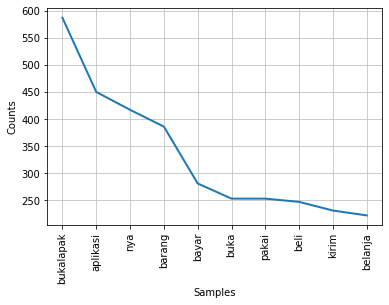

In [63]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [64]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik...","[bagus, sih, cuman, ribet, kali, update, aplik...",bagus sih cuman ribet kali update aplikasi sus...,0
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0
...,...,...,...,...,...,...,...,...,...,...
1295,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke...","[sudah, di, install, ulang, tetap, saja, engga...","[install, ulang, kebuka, gambarnya, lemot, ban...","[install, ulang, buka, gambar, lot, banget, to...",install ulang buka gambar lot banget tolong ba...,0
1296,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasi, super, super, berat, banyak, iklan,...",aplikasi super super berat banyak iklan pajang...,0
1297,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, bik, sedia, latih, ajar, skill, aka...",platform bik sedia latih ajar skill akademi me...,1
1298,Pengguna Google,5,2019-02-04 14:15:16,aplikasinya makin mudah dipake makin friendly ...,"[aplikasinya, makin, mudah, dipake, makin, fri...","[aplikasinya, makin, mudah, dipakai, makin, fr...","[aplikasinya, mudah, dipakai, friendly, uinya,...","[aplikasi, mudah, pakai, friendly, uinya, suka...",aplikasi mudah pakai friendly uinya suka platf...,1


In [65]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [66]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik...","[bagus, sih, cuman, ribet, kali, update, aplik...",bagus sih cuman ribet kali update aplikasi sus...,0
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0


In [67]:
from textblob import TextBlob


In [68]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [69]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.35,0.55,Positive
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik...","[bagus, sih, cuman, ribet, kali, update, aplik...",bagus sih cuman ribet kali update aplikasi sus...,0,0.00,0.00,Neutral
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0,0.00,0.00,Neutral
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0,0.00,0.00,Neutral
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0,0.00,0.00,Neutral


In [70]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.350000,0.550000,Positive
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik...","[bagus, sih, cuman, ribet, kali, update, aplik...",bagus sih cuman ribet kali update aplikasi sus...,0,0.000000,0.000000,Neutral
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0,0.000000,0.000000,Neutral
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0,0.000000,0.000000,Neutral
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke...","[sudah, di, install, ulang, tetap, saja, engga...","[install, ulang, kebuka, gambarnya, lemot, ban...","[install, ulang, buka, gambar, lot, banget, to...",install ulang buka gambar lot banget tolong ba...,0,0.000000,0.000000,Neutral
1296,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasi, super, super, berat, banyak, iklan,...",aplikasi super super berat banyak iklan pajang...,0,0.333333,0.666667,Positive
1297,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, bik, sedia, latih, ajar, skill, aka...",platform bik sedia latih ajar skill akademi me...,1,0.000000,0.000000,Neutral
1298,Pengguna Google,5,2019-02-04 14:15:16,aplikasinya makin mudah dipake makin friendly ...,"[aplikasinya, makin, mudah, dipake, makin, fri...","[aplikasinya, makin, mudah, dipakai, makin, fr...","[aplikasinya, mudah, dipakai, friendly, uinya,...","[aplikasi, mudah, pakai, friendly, uinya, suka...",aplikasi mudah pakai friendly uinya suka platf...,1,0.243750,0.300000,Positive


In [71]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

Positive words


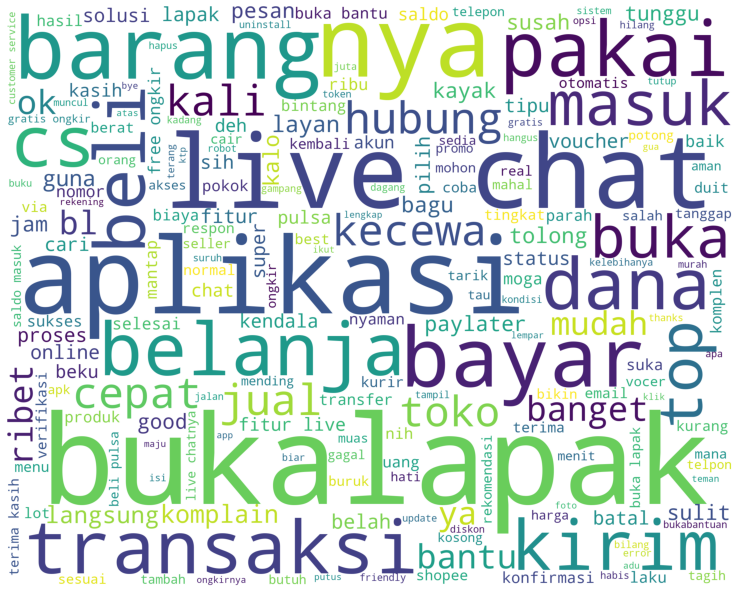

Negative words


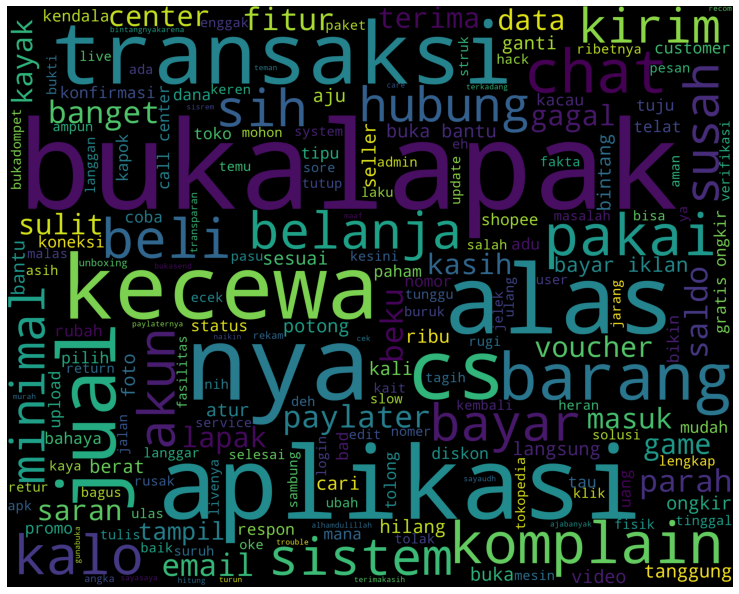

Neutral words


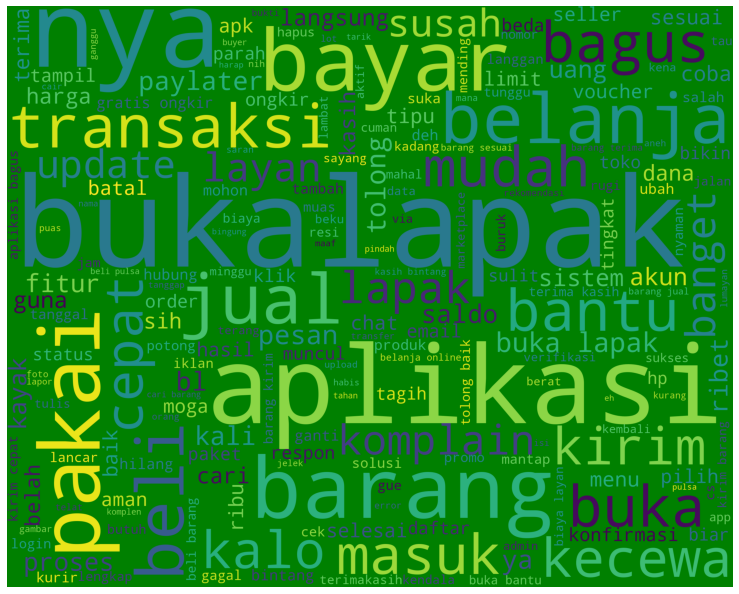

In [72]:
train_pos = name_dataframe[ name_dataframe['Sentiment'] == 'Positive']
train_pos = train_pos['Ulasan_clean']
train_neg = name_dataframe[ name_dataframe['Sentiment'] == 'Negative']
train_neg = train_neg['Ulasan_clean']
train_net = name_dataframe[ name_dataframe['Sentiment'] == 'Neutral']
train_net = train_net['Ulasan_clean']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_net,'green')

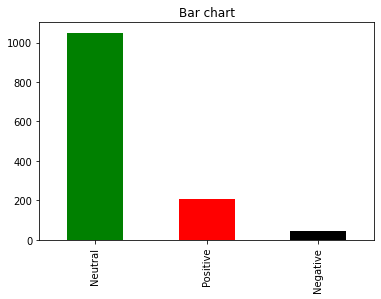

In [73]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [74]:
name_dataframe["Sentiment"].value_counts()

Neutral     1049
Positive     208
Negative      43
Name: Sentiment, dtype: int64

In [75]:
name_dataframe["Sentiment"].value_counts()

Neutral     1049
Positive     208
Negative      43
Name: Sentiment, dtype: int64

In [76]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [77]:
Ulasan = name_dataframe['Ulasan_clean']

In [78]:
Ulasan.isnull().sum()

0

In [79]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3506


In [80]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'aplikasi': 166,
 'parah': 2302,
 'belanja': 347,
 'cc': 628,
 'pilih': 2462,
 'klik': 1534,
 'cicil': 667,
 'tagih': 3101,
 'full': 1048,
 'confirmasi': 684,
 'urus': 3391,
 'teman': 3160,
 'metode': 1979,
 'korban': 1593,
 'kabar': 1383,
 'bukalapak': 531,
 'bagus': 228,
 'sih': 2959,
 'cuman': 708,
 'ribet': 2685,
 'kali': 1407,
 'update': 3373,
 'susah': 3077,
 'transaksi': 3285,
 'hp': 1207,
 'memori': 1927,
 'batas': 307,
 'hapus': 1161,
 'paksa': 2294,
 'buka': 524,
 'akun': 87,
 'bl': 453,
 'barusan': 300,
 'cerita': 649,
 'barang': 282,
 'beli': 350,
 'harap': 1163,
 'dibl': 796,
 'murah': 2040,
 'promo': 2551,
 'tarik': 3134,
 'jual': 1369,
 'lengkap': 1740,
 'sekali': 2834,
 'seller': 2859,
 'akibat': 72,
 'mahal': 1822,
 'marketplace': 1876,
 'belah': 345,
 'saat': 2727,
 'voucher': 3436,
 'gratis': 1117,
 'ongkir': 2223,
 'asih': 195,
 'diskon': 850,
 'nya': 2161,
 'instan': 1275,
 'maaf': 1814,
 'kasih': 1433,
 'bintang': 433,
 'layan': 1720,
 'customer': 713,
 'aju': 66

In [81]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 166)	1
  (0, 347)	2
  (0, 531)	1
  (0, 628)	1
  (0, 667)	2
  (0, 684)	1
  (0, 1048)	1
  (0, 1383)	1
  (0, 1534)	1
  (0, 1593)	1
  (0, 1979)	1
  (0, 2302)	1
  (0, 2462)	1
  (0, 3101)	1
  (0, 3160)	1
  (0, 3391)	1
  (1, 166)	2
  (1, 228)	1
  (1, 307)	1
  (1, 708)	1
  (1, 1161)	1
  (1, 1207)	1
  (1, 1407)	1
  (1, 1927)	1
  (1, 2294)	1
  :	:
  (1298, 2558)	1
  (1298, 2899)	2
  (1298, 2908)	1
  (1298, 3056)	1
  (1298, 3147)	1
  (1298, 3323)	1
  (1298, 3337)	1
  (1298, 3343)	1
  (1298, 3436)	2
  (1298, 3461)	1
  (1298, 3488)	1
  (1299, 166)	2
  (1299, 213)	1
  (1299, 261)	1
  (1299, 379)	1
  (1299, 524)	1
  (1299, 746)	1
  (1299, 1778)	1
  (1299, 2146)	1
  (1299, 2424)	1
  (1299, 2593)	1
  (1299, 2659)	1
  (1299, 2996)	1
  (1299, 3001)	1
  (1299, 3239)	1


In [82]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

bagus sih cuman ribet kali update aplikasi susah transaksi susah hp memori batas hapus paksa aplikasi ribet


In [83]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 166)	2
  (0, 228)	1
  (0, 307)	1
  (0, 708)	1
  (0, 1161)	1
  (0, 1207)	1
  (0, 1407)	1
  (0, 1927)	1
  (0, 2294)	1
  (0, 2685)	2
  (0, 2959)	1
  (0, 3077)	2
  (0, 3285)	1
  (0, 3373)	1


In [84]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.4777413  7.07227619 7.07227619 ... 7.4777413  7.4777413  7.4777413 ]
  (0, 3373)	0.2023231911890376
  (0, 3285)	0.16355082347885874
  (0, 3077)	0.3794134216360153
  (0, 2959)	0.20463350016138068
  (0, 2685)	0.3880034161185354
  (0, 2294)	0.2955955082776018
  (0, 1927)	0.34739267397766005
  (0, 1407)	0.19662808693854875
  (0, 1207)	0.23633026524183878
  (0, 1161)	0.2535587077951582
  (0, 708)	0.2601041806685547
  (0, 307)	0.2764100187595658
  (0, 228)	0.1679739889030256
  (0, 166)	0.23833475158413106


In [85]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "Sentiment"]]

In [86]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-86-5732072d6cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [87]:
data_label.to_excel("data_label.xlsx")

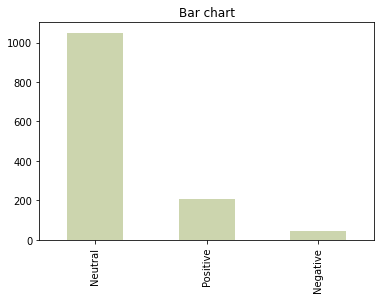

In [88]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

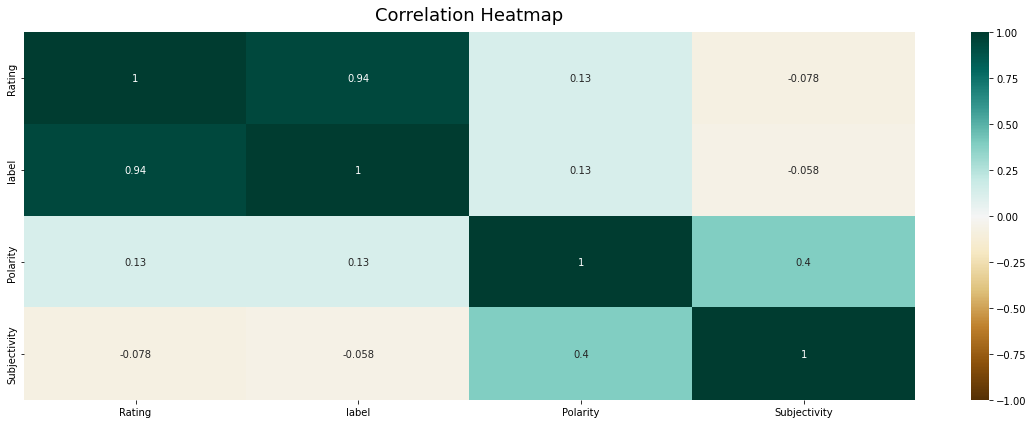

In [89]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [90]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label', 'Polarity', 'Subjectivity', 'Sentiment'],
      dtype='object')

In [91]:
from wordcloud import WordCloud

In [92]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [93]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-93-4a391e85ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [94]:
train_s0

,Nama pengguna,Ulasan_clean,Sentiment
15,Ahmad Amek,maaf turun bintangnyakarena pakai bukalapak pa...,Negative
16,Ulfa Mar'atus Solihah,edit ulas hubung customer care aplikasi kait b...,Negative
27,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem gunab...,Negative
45,Tegar Ibnu,sih asih voucher gratis ongkir minimal potong ...,Negative
89,WesLi,susah hubungin cs sulit hubung cs pakai email ...,Negative
102,official store,aplikasi sungguh kecewa konsisten terap atur s...,Negative
104,Novi Nurhalimah,kecewa aplikasi bukalapak telat bayar jatuh te...,Negative
106,Helmi Arianto,jual barang bukalapak sabtu sore transaksi bar...,Negative
114,Richo Agustian,halo bukalapak email ganti alas gagal kirim em...,Negative
127,Hambali,rekan saran belanja bukalapak bayak tipu salah...,Negative


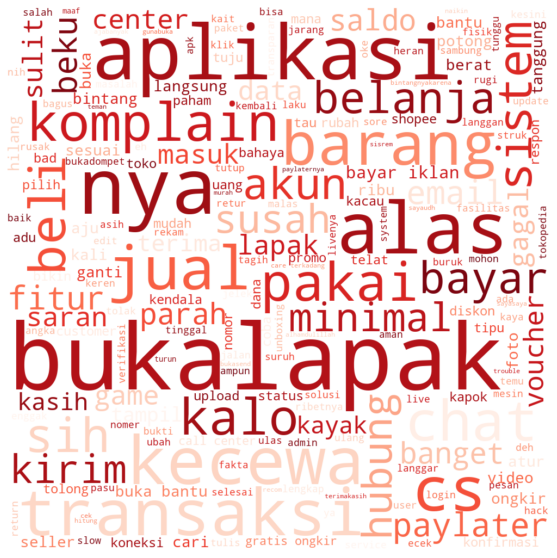

In [95]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

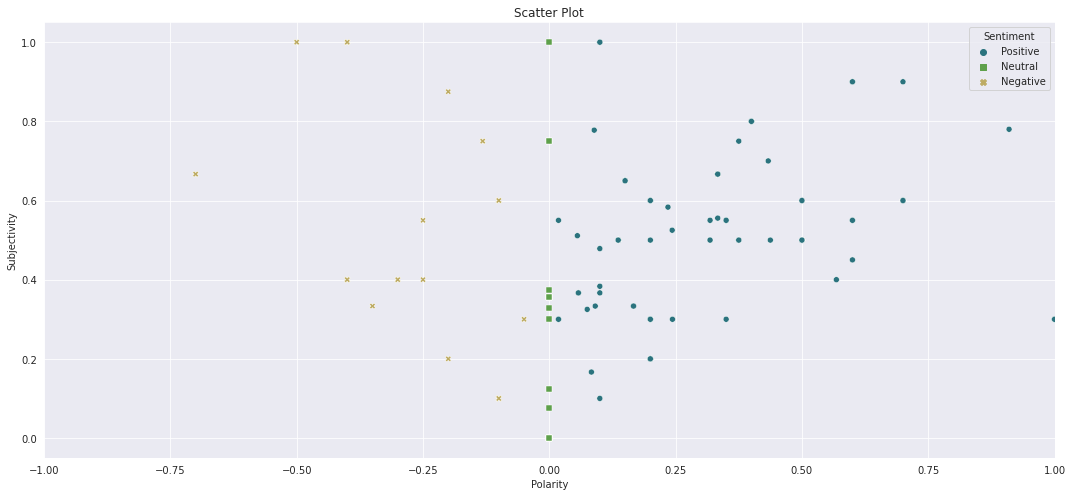

In [96]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

In [97]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [98]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-98-89653e0cae75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [99]:
train_s1

,Nama pengguna,Ulasan_clean,Sentiment
0,Ryan Apriandi,aplikasi parah belanja cc pilih klik cicil tag...,Positive
7,rizky adhi,fitur live chat tipu kontak cs hubung konsumen...,Positive
10,Animah Astuti,kali bintang sih csnya ramah layan langgan kai...,Positive
11,Hajna Agung Milkham,bobrok mesan cod masuk tagih detail sedia bata...,Positive
22,kastowo taylor,pakai bukalapak kali kecewa beli barang lapak ...,Positive
...,...,...,...
1280,kartika dewi,aplikasi kecewa suami kena hack belanja bukala...,Positive
1288,Star Online,mantap suka ok kecewa vocer ya vocer gratis on...,Positive
1290,Pengguna Google,bukalapak aplikasi ecommerce download belanja ...,Positive
1296,Fahmi,aplikasi super super berat banyak iklan pajang...,Positive


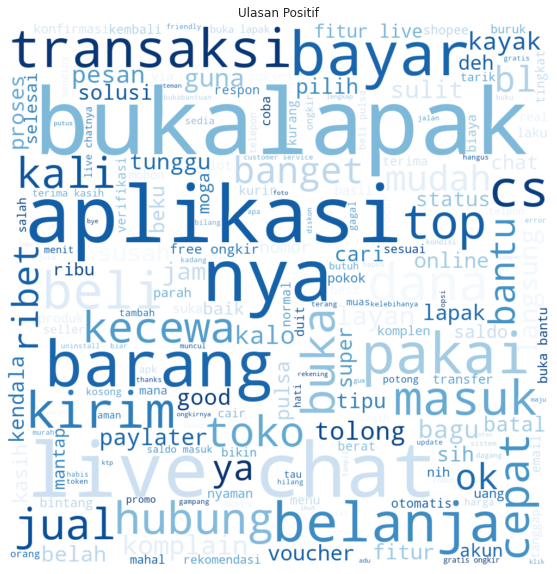

In [100]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [101]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

<ipython-input-101-27b828896519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

In [103]:
import numpy as np

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [105]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1170, 3265)
(130, 3265)


In [106]:
X_train = X_train.toarray()

In [107]:
X_test = X_test.toarray()

In [108]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [124]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=1000)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 1000 candidates, totalling 15000 fits


{'var_smoothing': 0.0008470868266557402}

In [110]:
nb = GaussianNB(var_smoothing=1.0)

In [111]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [112]:
y_pred_nb = nb.predict(X_test)

In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [131]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

ValueError: ignored

In [132]:
cm = confusion_matrix(y_test, y_pred_nb)

In [133]:

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 2  1  1]
 [43 46 16]
 [ 7  2 12]]


In [114]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[ 2  1  1]
 [43 46 16]
 [ 7  2 12]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.04      0.50      0.07         4
     Neutral       0.94      0.44      0.60       105
    Positive       0.41      0.57      0.48        21

    accuracy                           0.46       130
   macro avg       0.46      0.50      0.38       130
weighted avg       0.83      0.46      0.56       130



In [120]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [116]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [117]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True)

In [118]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [119]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))

---------------  Regresi Logistik  -------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.88      1.00      0.93       105
    Positive       1.00      0.48      0.65        21

    accuracy                           0.88       130
   macro avg       0.62      0.49      0.53       130
weighted avg       0.87      0.88      0.86       130

--------------------- SVM ----------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.88      1.00      0.93       105
    Positive       1.00      0.48      0.65        21

    accuracy                           0.88       130
   macro avg       0.62      0.49      0.53       130
weighted avg       0.87      0.88      0.86       130



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat